In [1]:
! pip install pydicom
! pip install rarfile

In [2]:
! python --version

Python 3.7.3


In [1]:
import os

def adjust_wkdir(cut_folder='notebook'):
    abspath = os.path.abspath('.')
    wk_dir = abspath.replace(cut_folder,'')
    os.chdir(wk_dir)
    return wk_dir


adjust_wkdir()

'/Users/felix/Documents/pj/dicom2nii/'

In [3]:
#coding=utf-8
from glob import glob
import os, sys
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rarfile
import zipfile

import shutil
import hashlib 
from customer.dicom2nii import *


In [5]:
input_fold = '/Volumes/PhiHardisk /lung/My Passport'
output_fold = '/Volumes/PhiHardisk /lung_output'

input_fold = '/Users/felix/Documents/med_data/武汉肺科/input'
output_fold = '/Users/felix/Documents/med_data/武汉肺科/output'
tmp_fold = '/Users/felix/Documents/med_data/武汉肺科/tmp'



In [6]:
ext_list = []
from collections import Counter

 
for file in glob(f'{input_fold}/**/*.*', recursive=True ):
    file_ext = file.split('.')[-1]
    ext_list.append(file_ext)
count = Counter(ext_list)
count.most_common

<bound method Counter.most_common of Counter({'rar': 1, 'zip': 1})>

In [7]:

def extract(input_file, out_file=tmp_fold):
    #print(f'{input_file}')

    
    if input_file.endswith('rar'):
        rf = rarfile.RarFile(input_file) 
        rf.extractall(out_file)
    elif input_file.endswith('zip'):
        extracting = zipfile.ZipFile(input_file)
        extracting.extractall(out_file)
        
    if out_file in input_file:
        
        os.remove(input_file)
        print(f'rm file:{input_file}')
        
    all_list =  list(glob(f'{out_file}/**/*.rar', recursive=True))
    zip_list =  list(glob(f'{out_file}/**/*.zip', recursive=True))
    all_list.extend(zip_list)

    if all_list:
        for file in all_list:
            if os.path.exists(file): 
                extract(file, out_file)
    else:
        return True

    
        
os.makedirs(tmp_fold, exist_ok=True)
for ext in ['rar' ]:
    for input_file in glob(f'{input_fold}/**/*.{ext}', recursive=True ): 
        print(input_file)
        shutil.rmtree(tmp_fold)
        os.makedirs(tmp_fold, exist_ok=True)
        extract(input_file, tmp_fold)
        
        #防止压缩包套压缩包
        
       
        zip_path_hash = hashlib.md5(input_file.encode()).hexdigest() 
        tmp_output_fold = f'{output_fold}/{zip_path_hash}'
        #print(input_file,zip_path_hash.hexdigest() )
        get_nii(tmp_fold,tmp_output_fold)
    

        

/Users/felix/Documents/med_data/武汉肺科/input/115-149.rar
rm file:/Users/felix/Documents/med_data/武汉肺科/tmp/115-149/119.zip
/Users/felix/Documents/med_data/武汉肺科/tmp/119/2020.1.27Zhu Xing Ming(28204424)/1
1 dcm convert to npy and save_to /Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0001_9dcdf5511f51020a565141a7d2b1815a
/Users/felix/Documents/med_data/武汉肺科/tmp/119/2020.2.7Zhu Xing Ming(28294580)/2
22 dcm convert to npy and save_to /Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0022_afc6204b8952cfa87387d8b8f852ccba
/Users/felix/Documents/med_data/武汉肺科/tmp/119/2020.2.7Zhu Xing Ming(28294580)/1
1 dcm convert to npy and save_to /Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0001_df67d9393e2bd934c85d2ca97b2ad77f
/Users/felix/Documents/med_data/武汉肺科/tmp/119/2020.2.7Zhu Xing Ming(28294580)/5
111 dcm convert to npy and save_to /Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0111_5

/Users/felix/Documents/med_data/武汉肺科/output
/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0026_8fc83a822aae72a6c7c08bc0eef5afe0.npz
(26, 512, 512)


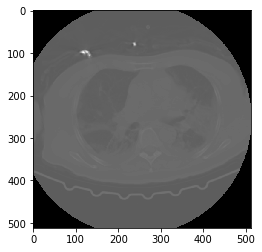

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0086_cbef187ba14e674bf548e09670d3e2c4.npz
(86, 512, 512)


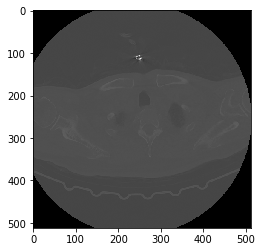

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0022_82aff71b13ef900e1dce228d0fa486b6.npz
(22, 512, 512)


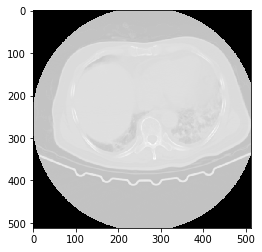

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0001_9dcdf5511f51020a565141a7d2b1815a.npz
(1, 512, 512)


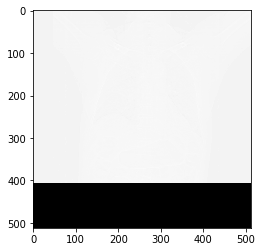

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0001_bccd1d72dbff4b8c7487b54fa7f874d4.npz
(1, 512, 512)


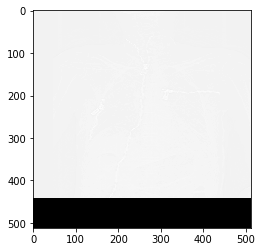

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0022_afc6204b8952cfa87387d8b8f852ccba.npz
(22, 512, 512)


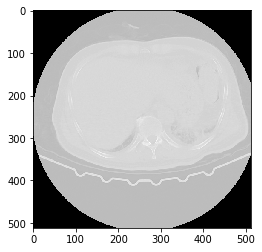

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0083_dcd68a387619e86a12351dc5e7fde03a.npz
(83, 512, 512)


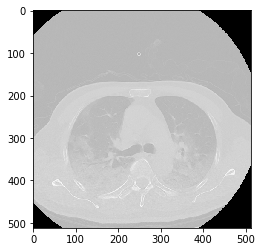

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0111_59f4fc206c8ab39dec8cd7fca4158fa8.npz
(111, 512, 512)


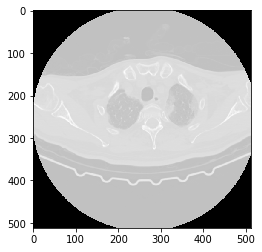

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0025_e90b91f8a2c14849889793c09910bf69.npz
(25, 512, 512)


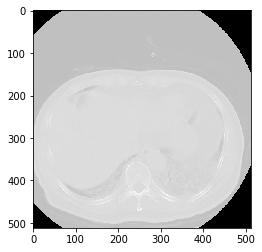

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0025_9dcc4f07294ab8d87e23e8dddce96e88.npz
(25, 512, 512)


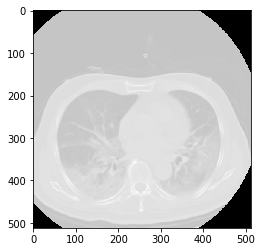

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0001_df67d9393e2bd934c85d2ca97b2ad77f.npz
(1, 512, 512)


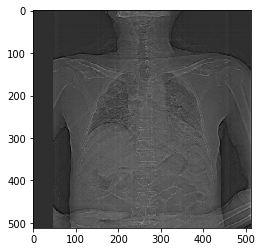

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0086_1cc6fae08542665db5d665f4abfa8345.npz
(86, 512, 512)


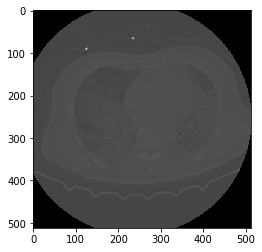

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0083_43688978d4d29b953c84776a37cebda3.npz
(83, 512, 512)


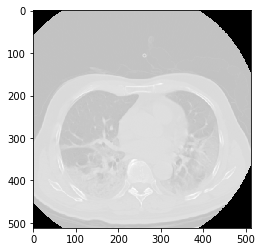

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0111_400dd265773310de0d654c63621ea12c.npz
(111, 512, 512)


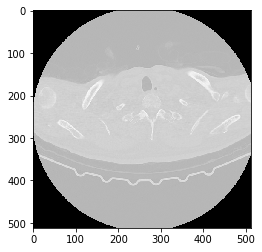

/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0026_ba1960b7d369b6cfddc8d1be53b35841.npz
(26, 512, 512)


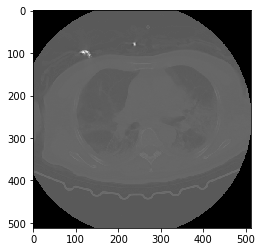

In [8]:
print(output_fold)
for file in glob(f'{output_fold}/**/*.npz', recursive=True):
    print(file)
    tmp = np.load(file)
    tmp = tmp.f.arr_0
    print(tmp.shape)
    plt.imshow(tmp[0], cmap='gray')
    plt.show()

(111, 512, 512)


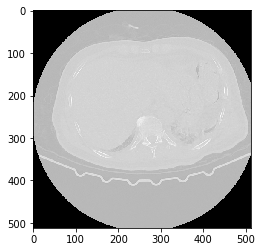

In [17]:
file = '/Users/felix/Documents/med_data/武汉肺科/output/729a0fa9a061e33f3c33e18bcfd5bc4b/0111_400dd265773310de0d654c63621ea12c.npz'
tmp = np.load(file)
tmp = tmp.f.arr_0
print(tmp.shape)

plt.imshow(tmp[80,:,:], cmap='gray')
plt.show()

28299351 9064867 2


(0008, 0000) Group Length                        UL: 636
(0008, 0005) Specific Character Set              CS: 'GB18030'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.7.106660.30000020020717484510700000153
(0008, 0020) Study Date                          DA: '20200207'
(0008, 0021) Series Date                         DA: '20200207'
(0008, 0022) Acquisition Date                    DA: '20200207'
(0008, 0023) Content Date                        DA: '20200207'
(0008, 002a) Acquisition DateTime                DT: '20200207175425.659000'
(0008, 0030) Study Time                          TM: '175309.550000'
(0008, 0031) Series Time                         TM: '175430.418000'
(0008, 0032) Acquisition Time                    TM: '175425.659000'
(0008, 0033) Content Time                        TM: '17542

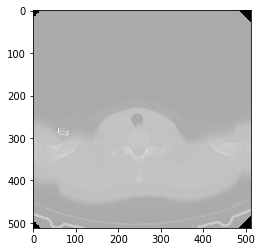

In [18]:
file = '/Users/felix/Documents/med_data/武汉肺科/sample/2-1_1_034CE18D.DCM'
ds = pydicom.dcmread(file, force=True)
ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
img = ds.pixel_array
print(ds.StudyID, ds.PatientID, ds.SeriesNumber)
plt.imshow(img, cmap='gray')
ds


(635, 512)


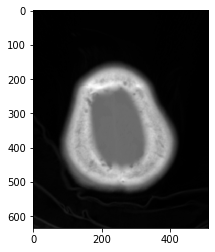

In [41]:
file = '/Volumes/My Passport/lung/tmp/2 2-10-炎-炎/CTCT00388370-黄锦妹/CTCT00388370-黄锦妹_250.DCM'
ds = pydicom.dcmread(file, force=True)
ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
ds.file_meta.PlanarConfiguration = 0
img = ds.pixel_array
print(img.shape)
plt.imshow(img,cmap='gray')

(512, 512)


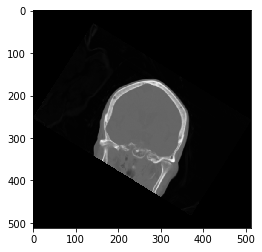

In [42]:
file = '/Volumes/My Passport/lung/tmp/2 2-10-炎-炎/CTCT00388370-黄锦妹/CTCT00388370-黄锦妹_246.DCM'
ds = pydicom.dcmread(file, force=True)
ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
ds.file_meta.PlanarConfiguration = 0

img = ds.pixel_array
print(img.shape)
plt.imshow(img,cmap='gray')

In [7]:

file = '/Users/felix/Documents/med_data/武汉肺科/sample/2/2-4_1_034CCB22.DCM'
ds = pydicom.dcmread(file, force=True)
ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
ds.file_meta.PlanarConfiguration = 0

img = ds.pixel_array
print(img.shape)
plt.imshow(img,cmap='gray')

InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

# 生成报告

In [11]:
from glob import glob
import pandas as pd
fold = '/Volumes/My Passport/lung/output/'
fold_list = []
for file in glob(f'{fold}/**/*.npz', recursive=True):
    file = file.replace(fold,'')
    split_fold = file.split('/')
    fold_list.append({'fold0':split_fold[0],'fold1':split_fold[1], 'fold2':split_fold[2], 'file':file  })
    
df = pd.DataFrame(fold_list)
df

,fold0,fold1,fold2,file
0,儿童数据,新冠儿童数据_10例_05_Mar_2020.rar,0121_358b86bbbb9be519aedc98ceb252333f.npz,儿童数据/新冠儿童数据_10例_05_Mar_2020.rar/0121_358b86bbb...
1,儿童数据,新冠儿童数据_10例_05_Mar_2020.rar,0121_9e97499535f0c4f52ec3c934edafc4ce.npz,儿童数据/新冠儿童数据_10例_05_Mar_2020.rar/0121_9e9749953...
2,儿童数据,新冠儿童数据_10例_05_Mar_2020.rar,0132_71dae480a3a1c4e7d4b3e0171893db1c.npz,儿童数据/新冠儿童数据_10例_05_Mar_2020.rar/0132_71dae480a...
3,儿童数据,新冠儿童数据_10例_05_Mar_2020.rar,0180_eaad40dd6854a2109488fc3b0359fa7d.npz,儿童数据/新冠儿童数据_10例_05_Mar_2020.rar/0180_eaad40dd6...
4,儿童数据,新冠儿童数据_10例_05_Mar_2020.rar,0185_c8e9cacdc7ce87179bda00737665d0b9.npz,儿童数据/新冠儿童数据_10例_05_Mar_2020.rar/0185_c8e9cacdc...
...,...,...,...,...
3716,肺部数据_0225,深圳二院,非肺炎,肺部数据_0225/深圳二院/非肺炎/20200221/非2-20.zip/0540_7f8...
3717,肺部数据_0225,深圳二院,非肺炎,肺部数据_0225/深圳二院/非肺炎/20200221/非2-20.zip/0582_64b...
3718,肺部数据_0225,深圳二院,非肺炎,肺部数据_0225/深圳二院/非肺炎/20200221/非2-20.zip/0699_74e...
3719,肺部数据_0225,深圳二院,非肺炎,肺部数据_0225/深圳二院/非肺炎/20200221/非2-20.zip/0730_89d...


In [12]:
df.groupby(['fold0', 'fold1', 'fold2']).file.count()

fold0      fold1                       fold2                                    
儿童数据       新冠儿童数据_10例_05_Mar_2020.rar  0121_358b86bbbb9be519aedc98ceb252333f.npz       1
                                       0121_9e97499535f0c4f52ec3c934edafc4ce.npz       1
                                       0132_71dae480a3a1c4e7d4b3e0171893db1c.npz       1
                                       0180_eaad40dd6854a2109488fc3b0359fa7d.npz       1
                                       0185_c8e9cacdc7ce87179bda00737665d0b9.npz       1
                                       0192_e546b40fa7985c5d28bc6359ebb94d71.npz       1
                                       0201_65e9d2cef169d63626ebbc2d1ce21dbc.npz       1
                                       0256_578722f8efecfab96fda3b7dc576d705.npz       1
                                       0265_7b86dbe9870b672548b1d1e86b2168a9.npz       1
                                       0530_5bcb02637fe7cc3a6581198ad24d57b5.npz       1
           新冠儿童数据_4例_26_Feb_2